# Visualizations

In [1]:
#Set Up Environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)



In [53]:
#Load in Data frames
dfmes = pd.read_csv('Merged Event_Sentiment.csv')
dffcd = pd.read_csv('Final_Clean_Data.csv')
biased = pd.read_csv('BiasedPredictions.csv')
unbiased = pd.read_csv('UnbiasedRatings.csv')

In [3]:
dffcd['Date']=pd.to_datetime(dffcd['Date'],format='%Y-%m-%d %H:%M:%S')

In [54]:
unbiased.head(5)

,Date,TeamRating,Predicted,Mode
0,2011-01-31,2-threatening,2,[2]
1,2011-03-11,3-aggressive,3,[3]
2,2011-03-26,0-friendly,0,[0]
3,2011-04-07,1-neutral,1,[1]
4,2011-04-16,1-neutral,1,[1]


## Graphs from - Merged Event_Sentiment.csv

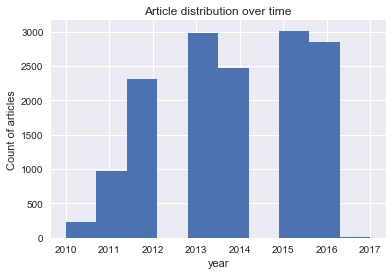

In [8]:
#Create a histogram to examine Article distribution over time.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dfmes['year'], bins = 10, range = (dfmes['year'].min(),dfmes['year'].max()))
plt.title('Article distribution over time')
plt.xlabel('year')
plt.ylabel('Count of articles')
plt.show()
  
#syrian articles started out pretty slow in 2010,  reached 1000 by 2011 and more than doubled by 2012. outside of small dip in 2014 syrian article production has remained above the 2700 level Published articles    

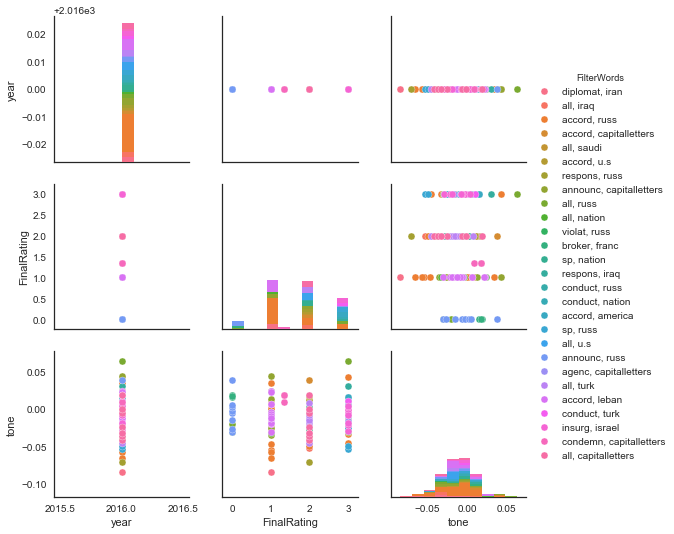

In [31]:
#Create a pair plot of features
g = sns.pairplot(data=dfmes[['year', 'FinalRating','tone','publication','publicationtype','FilterWords']], hue='FilterWords', dropna=True)



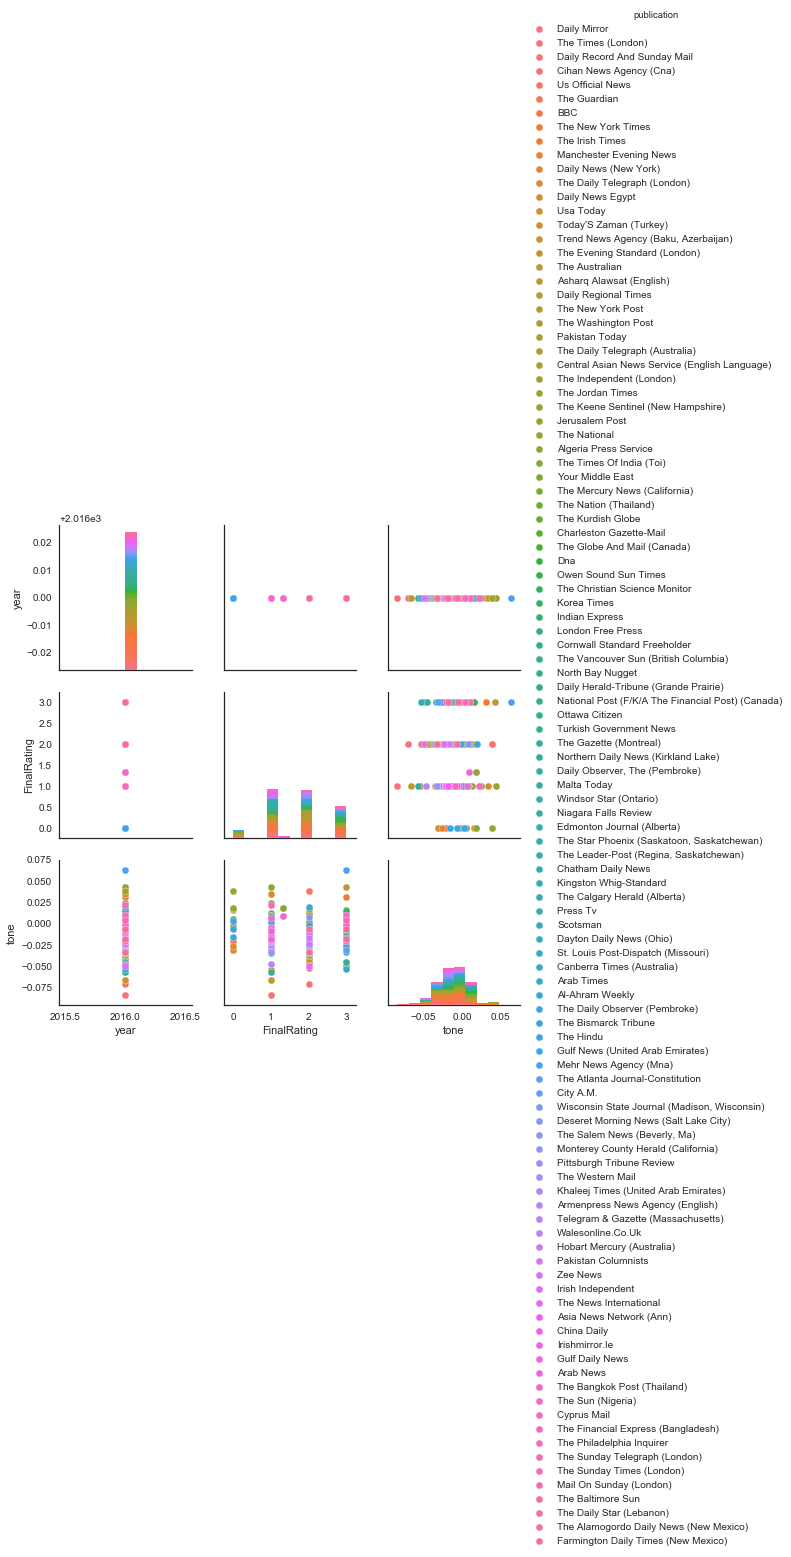

In [44]:
i = sns.pairplot(data=dfmes[['year', 'FinalRating','tone','publication','publicationtype']], hue='publication', dropna=True)

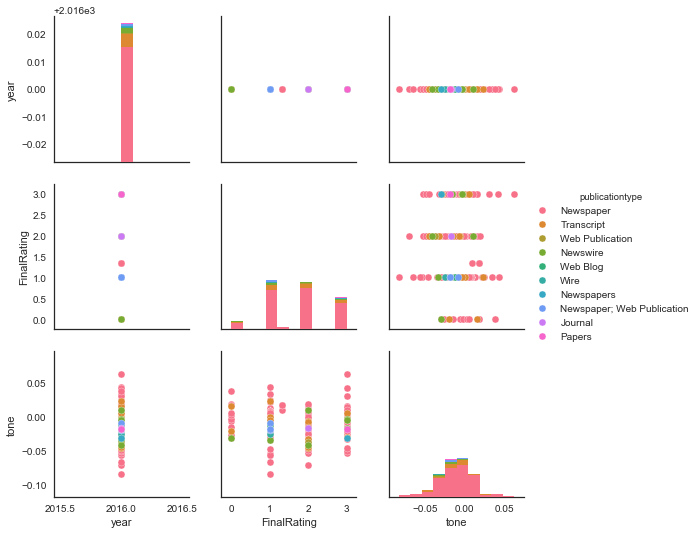

In [34]:
#FilterWords
#Create a pair plot of features
h = sns.pairplot(data=dfmes[['year', 'FinalRating','tone','publication','publicationtype']], hue='publicationtype', dropna=True)

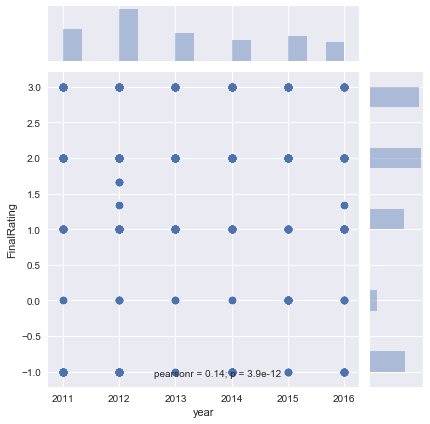

In [10]:
#Create a Joinplot
g = sns.jointplot("year", "FinalRating", dfmes)

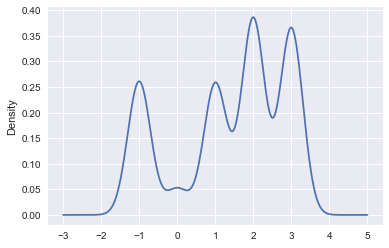

In [11]:
Kernel density 
dfmes['FinalRating'].plot(kind='kde')

# Graphs from - Final_Clean_Data.csv

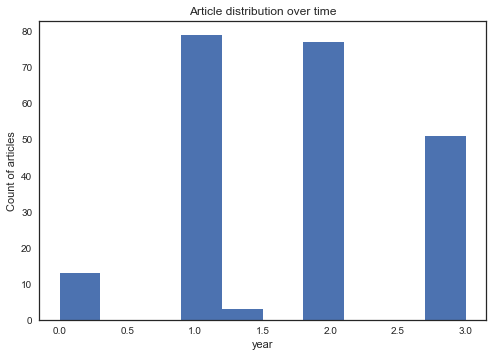

In [40]:
#Create a histogram to examine Article distribution over time.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dfmes['FinalRating'], bins = 10, range = (dffcd['FinalRating'].min(),dfmes['FinalRating'].max()))
plt.title('Article distribution over time')
plt.xlabel('year')
plt.ylabel('Count of articles')
plt.show()

(array([ 733773.,  734138.,  734503.,  734869.,  735234.,  735599.,
         735964.,  736330.]), <a list of 8 Text xticklabel objects>)

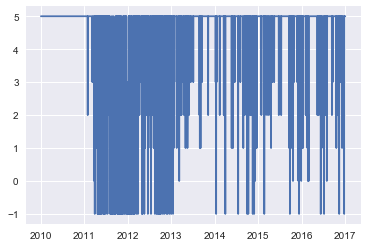

In [13]:
dffcd = dffcd.sort_values('Date', ascending=True)
plt.plot(dffcd['Date'], dffcd['FinalRating'])
plt.xticks(rotation='horizontal')

# Final Cleaned Data instance before predictions

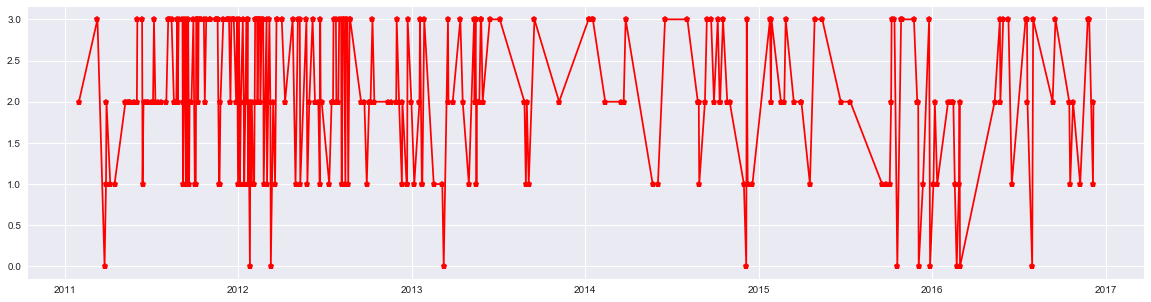

In [14]:
# Keep the ratings equal to 0, 1, 2, 3 or whatever ratings you wanted to keep.  
mask = (dffcd['FinalRating'] >= 0) & (dffcd['FinalRating'] < 4)
dffcd = dffcd.loc[mask]

fig = plt.figure(figsize=(20,5))
#gfc().autofmt_xdate()
ax = fig.add_subplot(111)
ax.plot_date(x=dffcd.Date, y=dffcd.FinalRating, linestyle='solid', color='Red', marker='p')

# Biased

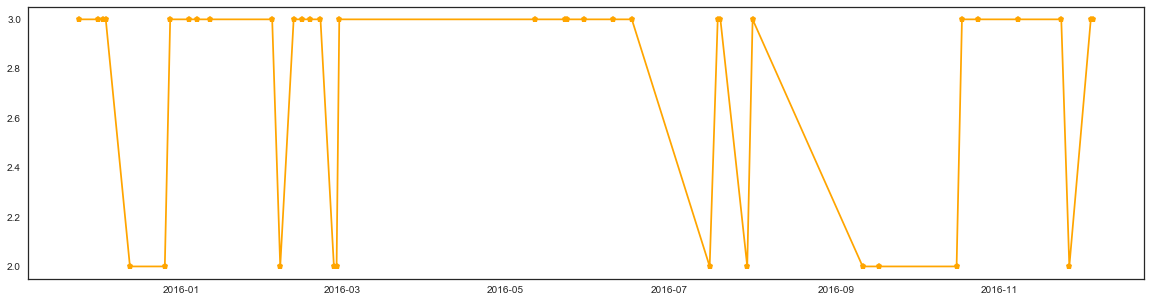

In [46]:
# Keep the ratings equal to 0, 1, 2, 3 or whatever ratings you wanted to keep.  
mask = (biased['FinalRating'] >= 0) & (biased['FinalRating'] < 4)
biased = biased.loc[mask]

fig = plt.figure(figsize=(20,5))
#gfc().autofmt_xdate()
ax = fig.add_subplot(111)
ax.plot_date(x=biased.Date, y=biased.FinalRating, linestyle='solid', color='Orange', marker='p')


# Unbiased

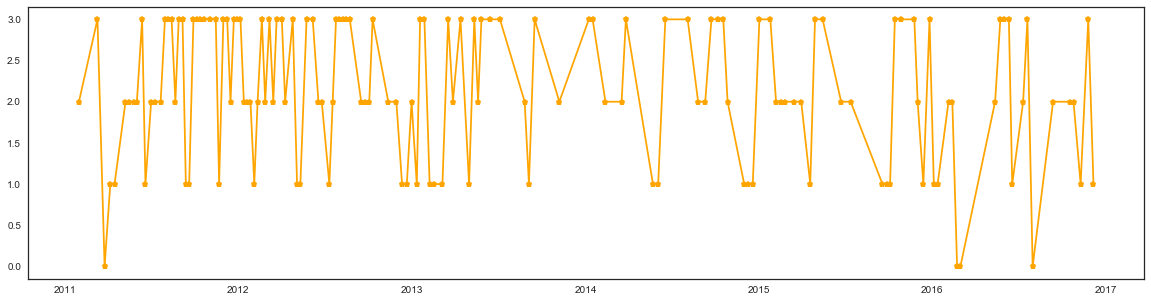

In [55]:

# Keep the ratings equal to 0, 1, 2, 3 or whatever ratings you wanted to keep.  
mask = (unbiased['Predicted'] >= 0) & (unbiased['Predicted'] < 4)
unbiased = unbiased.loc[mask]

fig = plt.figure(figsize=(20,5))
#gfc().autofmt_xdate()
ax = fig.add_subplot(111)
ax.plot_date(x=unbiased.Date, y=unbiased.Predicted, linestyle='solid', color='Orange', marker='p')


# merged predictions graph

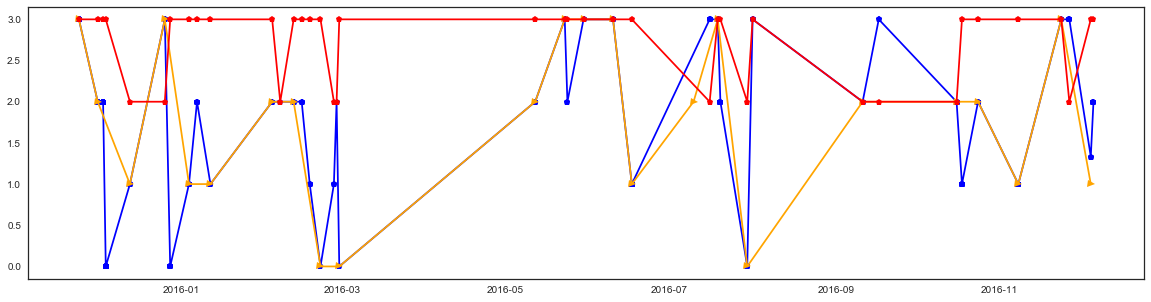

In [57]:
# Keep the ratings equal to 0, 1, 2, 3 or whatever ratings you wanted to keep.  
mask = (dfmes['FinalRating'] >= 0) & (dfmes['FinalRating'] < 4) & (dfmes['Date']>='2015-11-11')
dfmes = dfmes.loc[mask]

mask2 = (unbiased['Predicted'] >= 0) & (unbiased['Predicted'] < 4)& (unbiased['Date']>='2015-11-01')
unbiased = unbiased.loc[mask2]

mask3 = (biased['FinalRating'] >= 0) & (biased['FinalRating'] < 4)& (biased['Date']>='2015-11-11')
biased = biased.loc[mask3]

fig = plt.figure(figsize=(20,5))
#gfc().autofmt_xdate()
ax = fig.add_subplot(111)
ax.plot_date(x=dfmes.Date, y=dfmes.FinalRating, linestyle='solid', color='Blue', marker='p')
ax.plot_date(x=unbiased.Date, y=unbiased.Predicted, linestyle='solid', color='Orange', marker='>')
ax.plot_date(x=biased.Date, y=biased.FinalRating, linestyle='solid', color='Red', marker='p')

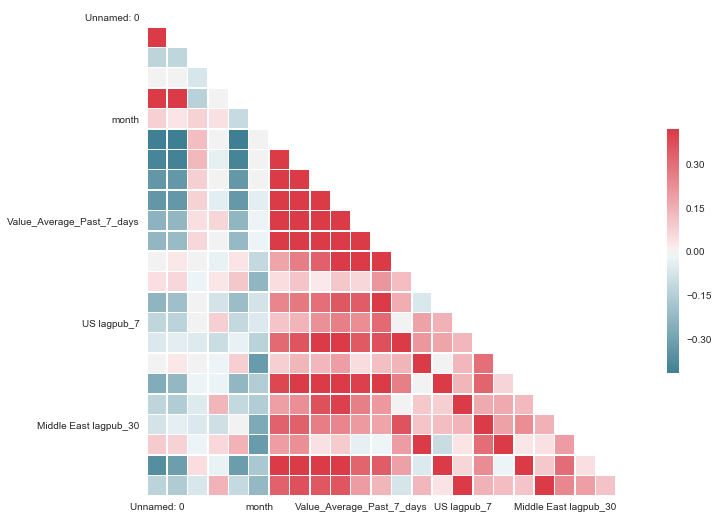

In [22]:
from string import ascii_letters as letters
sns.set(style="white")
 
# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(letters[:26]))

# Compute the correlation matrix
corr = dffcd.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)